# 4.4.1 Phân cụm hoa dựa trên Chiều dài cánh hoa (Petal Length) và Chiều rộng cánh hoa (Petal Width)

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Tiền xử lý dữ liệu và chuẩn hóa dữ liệu

In [88]:
# 1. Đọc dữ liệu từ Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.info())
print(df.head())

# 2. Xuất dữ liệu gốc
preprocessed_path = "./Data/iris.xlsx"
df.to_excel(preprocessed_path, index=False, engine='openpyxl')
print(f"Xuất dữ liệu gốc thành công: {preprocessed_path}")

# 3. Chọn các đặc trưng để phân cụm - chỉ sử dụng 2 đặc trưng liên quan đến cánh hoa
selected_features = ['petal length (cm)', 'petal width (cm)']  # Chỉ sử dụng 2 đặc trưng của cánh hoa
X = df[selected_features]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Xuất dữ liệu gốc thành công: ./Data/iris.xlsx


In [89]:
# Xuất dữ liệu đã chọn 2 đặc trưng
selected_features_path = "./Data/iris_Selected_Features.xlsx"
X.to_excel(selected_features_path, index=False, engine='openpyxl')
print(f"Xuất dữ liệu với 2 đặc trưng đã chọn thành công: {selected_features_path}")

Xuất dữ liệu với 2 đặc trưng đã chọn thành công: ./Data/iris_Selected_Features.xlsx


In [91]:
# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Xuất dữ liệu đã chuẩn hóa
normalized_df = pd.DataFrame(X_scaled, columns=selected_features)
normalized_path = "./Data/iris_Normalized.xlsx"
normalized_df.to_excel(normalized_path, index=False, engine='openpyxl')
print(f"Xuất dữ liệu chuẩn hóa thành công: {normalized_path}")

Xuất dữ liệu chuẩn hóa thành công: ./Data/iris_Normalized.xlsx


## Vẽ K-distance và xác định điểm gãy

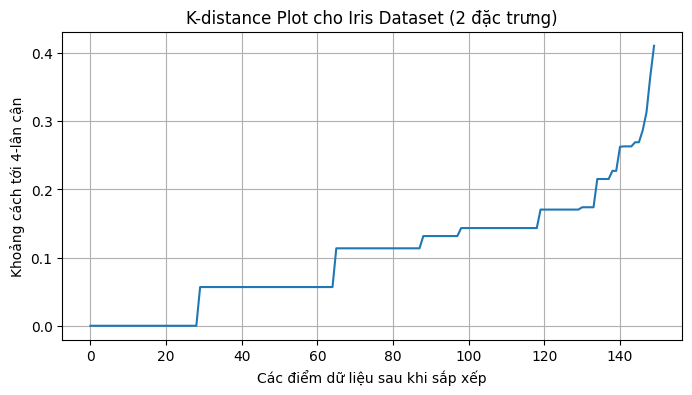

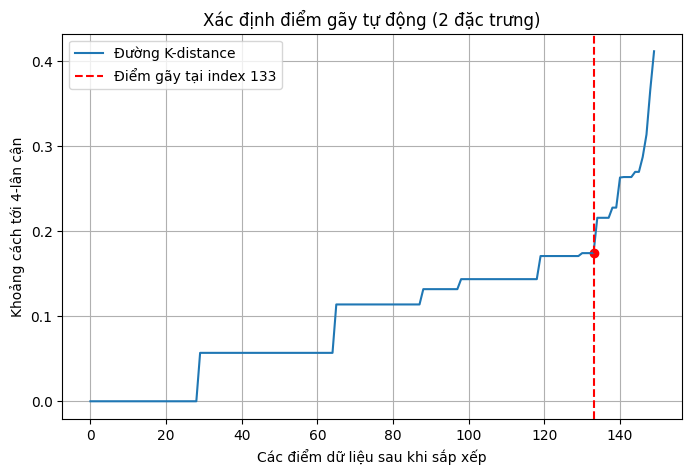

✅ Giá trị Epsilon tối ưu: 0.174


In [92]:
# 5. Xác định tham số epsilon bằng K-distance plot
k = 4  # MinPts
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, k-1])

# Vẽ biểu đồ K-distance
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title("K-distance Plot cho Iris Dataset (2 đặc trưng)")
plt.xlabel("Các điểm dữ liệu sau khi sắp xếp")
plt.ylabel(f"Khoảng cách tới {k}-lân cận")
plt.grid(True)
plt.show()

# Tìm điểm gãy tự động
x_vals = np.arange(len(k_distances))
start_point = np.array([x_vals[0], k_distances[0]])
end_point = np.array([x_vals[-1], k_distances[-1]])
line_vec = end_point - start_point
line_vec_norm = line_vec / np.linalg.norm(line_vec)
vec_from_start = np.column_stack((x_vals, k_distances)) - start_point
scalar_proj = np.dot(vec_from_start, line_vec_norm)
proj = np.outer(scalar_proj, line_vec_norm)
vec_to_line = vec_from_start - proj
dist_to_line = np.linalg.norm(vec_to_line, axis=1)
elbow_index = np.argmax(dist_to_line)
optimal_eps = k_distances[elbow_index]

# Vẽ kết quả điểm gãy
plt.figure(figsize=(8, 5))
plt.plot(k_distances, label="Đường K-distance")
plt.axvline(elbow_index, color='r', linestyle='--', label=f"Điểm gãy tại index {elbow_index}")
plt.scatter(elbow_index, optimal_eps, color='red')
plt.title("Xác định điểm gãy tự động (2 đặc trưng)")
plt.xlabel("Các điểm dữ liệu sau khi sắp xếp")
plt.ylabel(f"Khoảng cách tới {k}-lân cận")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Giá trị Epsilon tối ưu: {round(optimal_eps, 3)}")

## Huấn luyện mô hình

In [93]:
# 5. Áp dụng DBSCAN với Epsilon (bạn có thể điều chỉnh eps theo kết quả từ đồ thị)
dbscan_model = DBSCAN(eps=optimal_eps, min_samples=k).fit(X_scaled)

# Gán nhãn cụm vào DataFrame
X['Cluster'] = dbscan_model.labels_

# Kiểm tra thông tin mô hình
dbscan_model

C:\Users\84967\AppData\Local\Temp\ipykernel_16624\1965197621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = dbscan_model.labels_


DBSCAN(eps=np.float64(0.17392240894626693), min_samples=4)

## Trực quan hóa kết quả phân cụm

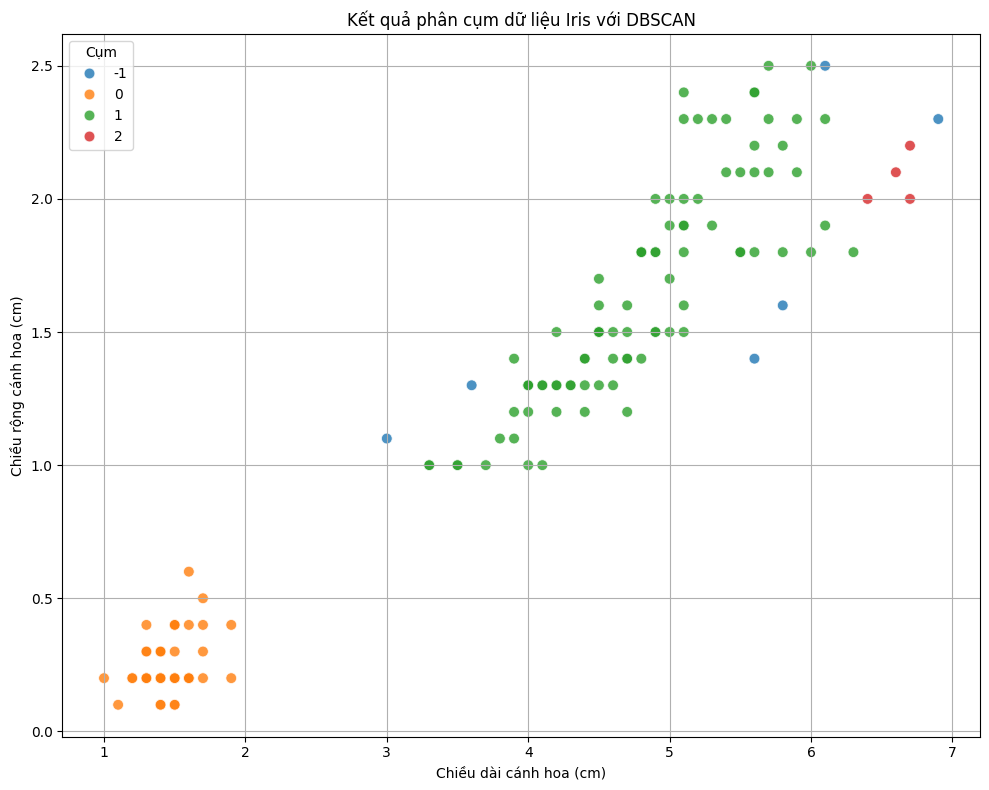

In [94]:
# 7. Trực quan hóa kết quả phân cụm (sử dụng hai đặc trưng đã chọn)
plt.figure(figsize=(10, 8))
# Tạo bảng màu với đủ màu cho các cụm
palette = sns.color_palette('tab10', n_colors=len(set(X['Cluster'].unique())))
sns.scatterplot(
    data=X,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster',
    palette=palette,
    s=60,
    alpha=0.8
)
plt.title("Kết quả phân cụm dữ liệu Iris với DBSCAN")
plt.xlabel("Chiều dài cánh hoa (cm)")
plt.ylabel("Chiều rộng cánh hoa (cm)")
plt.legend(title='Cụm')
plt.grid(True)
plt.tight_layout()
plt.show()

## Tính Silhouette Score

In [95]:
# 8. Tính Silhouette Score (loại bỏ các điểm nhiễu với nhãn -1)
labels = dbscan_model.labels_
mask = labels != -1

if len(set(labels[mask])) > 1:
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"Silhouette Score: {score:.3f}")
else:
    print("⚠️ Không đủ cụm hợp lệ để tính Silhouette Score.")

Silhouette Score: 0.485


# 4.4.2 Phân cụm hoa dựa trên Chiều dài cánh hoa (Petal Length) và Chiều dài đài hoa (Sepal Length)

## Chuẩn hóa dữ liệu

In [73]:
selected_features = ['petal length (cm)', 'sepal length (cm)']  # Chỉ sử dụng 2 đặc trưng của cánh hoa
X = df[selected_features]

X_scaled = scaler.fit_transform(X)

## Vẽ K-distance và xác định điểm gãy

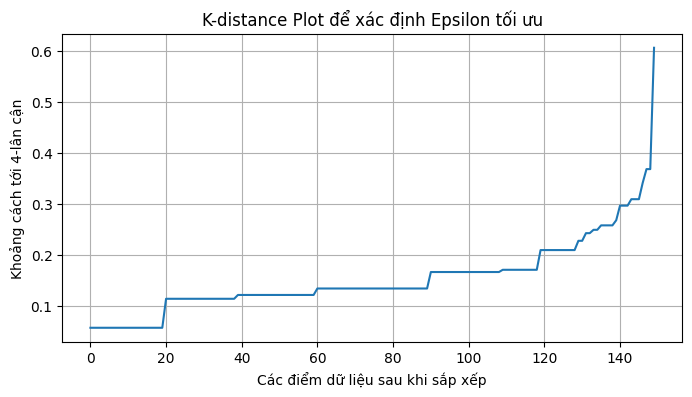

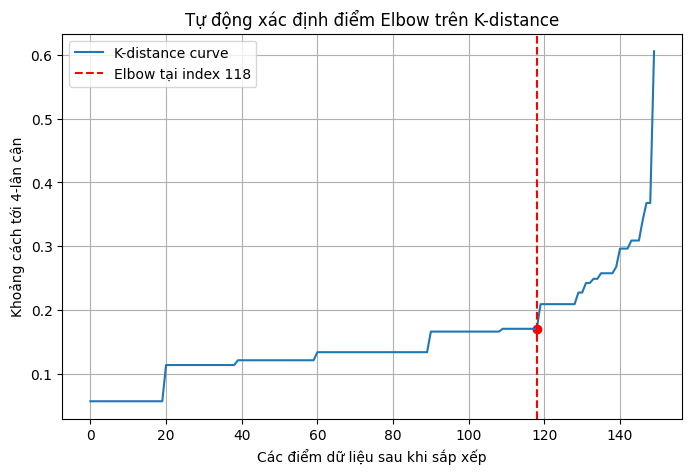

✅ Giá trị Epsilon tối ưu được xác định là: 0.171


In [74]:
#Tìm Epsilon
k = 4  # MinPts = 4 (2 * số chiều = 2*2 nếu dùng 2 đặc trưng)
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title("K-distance Plot để xác định Epsilon tối ưu")
plt.xlabel("Các điểm dữ liệu sau khi sắp xếp")
plt.ylabel(f"Khoảng cách tới {k}-lân cận")
plt.grid(True)
plt.show()

# Tìm điểm gãy (Elbow) bằng cách tính khoảng cách từ mỗi điểm đến đường thẳng nối đầu-cuối
y_vals = np.arange(len(k_distances))
start_point = np.array([y_vals[0], k_distances[0]])
end_point = np.array([y_vals[-1], k_distances[-1]])
line_vec = end_point - start_point
line_vec_norm = line_vec / np.linalg.norm(line_vec)
vec_from_start = np.column_stack((y_vals, k_distances)) - start_point
scalar_proj = np.dot(vec_from_start, line_vec_norm)
proj = np.outer(scalar_proj, line_vec_norm)
vec_to_line = vec_from_start - proj
dist_to_line = np.linalg.norm(vec_to_line, axis=1)
elbow_index = np.argmax(dist_to_line)
optimal_eps = k_distances[elbow_index]

plt.figure(figsize=(8, 5))
plt.plot(k_distances, label="K-distance curve")
plt.axvline(elbow_index, color='r', linestyle='--', label=f"Elbow tại index {elbow_index}")
plt.scatter(elbow_index, optimal_eps, color='red')
plt.title("Tự động xác định điểm Elbow trên K-distance")
plt.xlabel("Các điểm dữ liệu sau khi sắp xếp")
plt.ylabel(f"Khoảng cách tới {k}-lân cận")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Giá trị Epsilon tối ưu được xác định là: {round(optimal_eps, 3)}")

## Huấn luyện mô hình

In [75]:
dbscan_model = DBSCAN(eps=optimal_eps, min_samples=k).fit(X)
X['Cluster2'] = dbscan_model.labels_
dbscan_model

C:\Users\84967\AppData\Local\Temp\ipykernel_16624\2406799007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster2'] = dbscan_model.labels_


DBSCAN(eps=np.float64(0.17051228074080982), min_samples=4)

## Trực quan hóa kết quả phân cụm

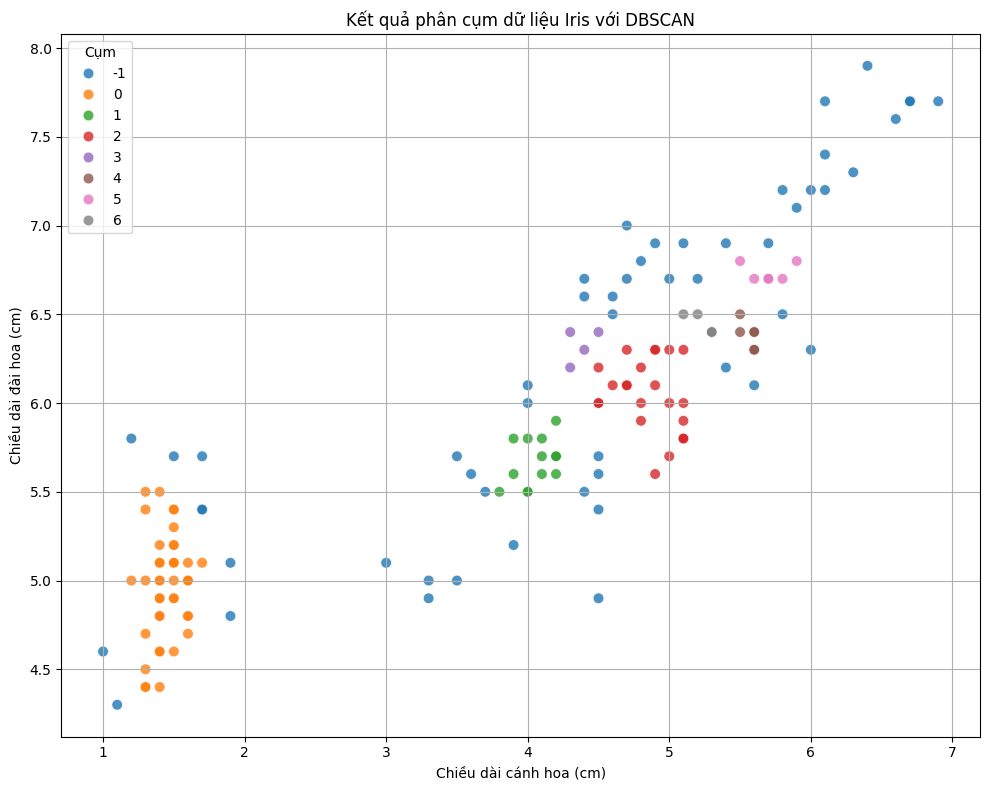

In [56]:
plt.figure(figsize=(10, 8))
# Tạo bảng màu với đủ màu cho các cụm
palette = sns.color_palette('tab10', n_colors=len(set(X['Cluster2'].unique())))
sns.scatterplot(
    data=X,
    x='petal length (cm)',
    y='sepal length (cm)',
    hue='Cluster2',
    palette=palette,
    s=60,
    alpha=0.8
)
plt.title("Kết quả phân cụm dữ liệu Iris với DBSCAN")
plt.xlabel("Chiều dài cánh hoa (cm)")
plt.ylabel("Chiều dài đài hoa (cm)")
plt.legend(title='Cụm')
plt.grid(True)
plt.tight_layout()
plt.show()

## Tính Silhouette Score

In [57]:
# Tính Silhouette Score (loại bỏ các điểm nhiễu với nhãn -1)
labels = dbscan_model.labels_
mask = labels != -1
if len(set(labels[mask])) > 1:
    score = silhouette_score(X[mask], labels[mask])
    print(f"Silhouette Score: {score:.3f}")
else:
    print("⚠️ Không đủ cụm hợp lệ để tính Silhouette Score.")

Silhouette Score: 0.817


# 4.4.3 Phân cụm hoa dựa trên Chiều rộng cánh hoa (Petal Width) và Chiều rộng đài hoa (Sepal Width)

## Chuẩn hóa dữ liệu

In [76]:
selected_features = ['sepal width (cm)', 'sepal length (cm)']  # Chỉ sử dụng 2 đặc trưng của cánh hoa
X = df[selected_features]

X_scaled = scaler.fit_transform(X)

## Hàm tìm epsilon và MinPts tối ưu bằng Grid Search

In [77]:
# Hàm tìm epsilon và MinPts tối ưu bằng Grid Search
def grid_search_dbscan(X_scaled, eps_range, minpts_range):
    best_eps = None
    best_minpts = None
    best_score = -1  # Khởi tạo điểm số tốt nhất
    best_labels = None
    
    for eps in eps_range:
        for minpts in minpts_range:
            dbscan = DBSCAN(eps=eps, min_samples=minpts)
            labels = dbscan.fit_predict(X_scaled)
            
            # Kiểm tra nếu có ít nhất 2 cụm (không tính noise) để tính silhouette score
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters > 1:
                score = silhouette_score(X_scaled, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_minpts = minpts
                    best_labels = labels
    
    return best_eps, best_minpts, best_score, best_labels

## Tiến hành tìm eps và minpts bằng grid search

In [78]:
# Xác định phạm vi thử nghiệm
eps_range = np.arange(0.1, 1.0, 0.05)  # Thử các giá trị từ 0.1 đến 1.0
minpts_range = range(3, 10)  # Thử MinPts từ 3 đến 9

# Chạy Grid Search
optimal_eps, optimal_minpts, optimal_score, optimal_labels = grid_search_dbscan(
    X_scaled, eps_range, minpts_range
)

# In kết quả tối ưu
print(f"✅ Giá trị tối ưu: Epsilon = {optimal_eps:.3f}, MinPts = {optimal_minpts}")
print(f"Silhouette Score tối ưu: {optimal_score:.3f}")

# Thêm nhãn cụm vào dữ liệu gốc
X_with_clusters = X.copy()
X_with_clusters['Cluster4'] = optimal_labels



✅ Giá trị tối ưu: Epsilon = 0.550, MinPts = 9
Silhouette Score tối ưu: 0.392


## Trực quan hóa kết quả phân cụm

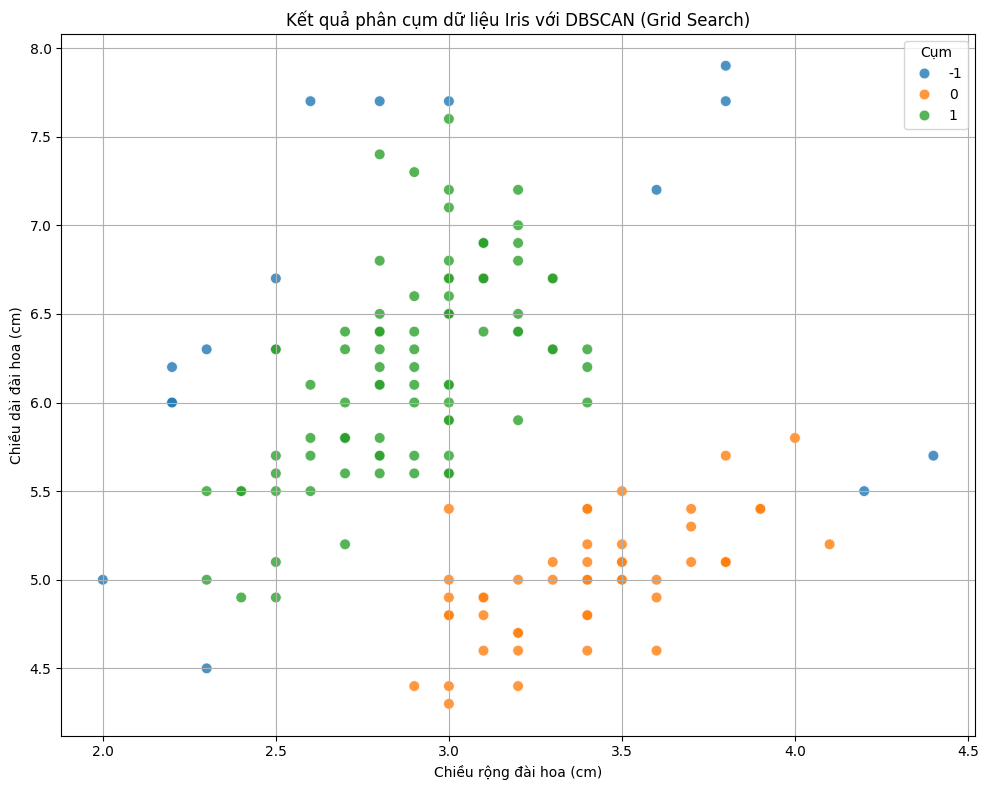

In [79]:
# Vẽ biểu đồ kết quả
plt.figure(figsize=(10, 8))
palette = sns.color_palette('tab10', n_colors=len(set(optimal_labels)))
sns.scatterplot(
    data=X_with_clusters,
    x='sepal width (cm)',
    y='sepal length (cm)',
    hue='Cluster4',
    palette=palette,
    s=60,
    alpha=0.8
)
plt.title("Kết quả phân cụm dữ liệu Iris với DBSCAN (Grid Search)")
plt.xlabel("Chiều rộng đài hoa (cm)")
plt.ylabel("Chiều dài đài hoa (cm)")
plt.legend(title='Cụm', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.4.4. Giảm Chiều Dữ Liệu

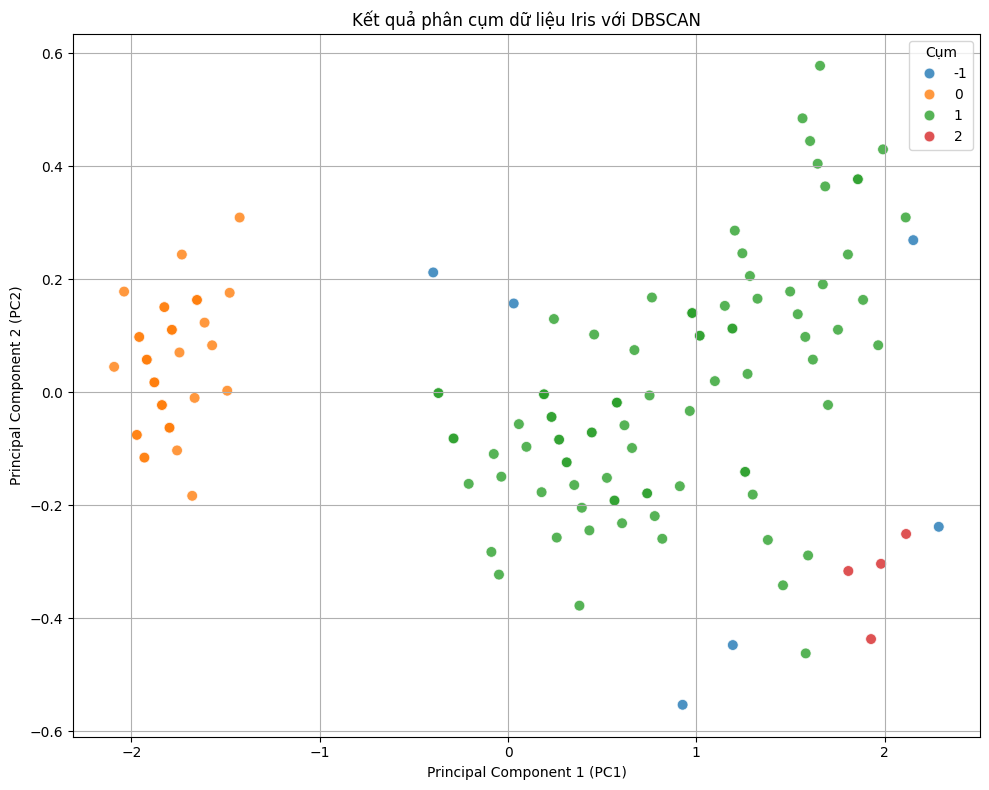

In [99]:
clusters = X['Cluster']
df = X.drop(['Cluster'], axis=1)

# Áp dụng PCA để giảm chiều về 2D
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])
X_reduced['Cluster'] = clusters

plt.figure(figsize=(10, 8))
# Tạo bảng màu với đủ màu cho các cụm
palette = sns.color_palette('tab10', n_colors=len(set(X_reduced['Cluster'].unique())))
sns.scatterplot(
    data=X_reduced,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette=palette,
    s=60,
    alpha=0.8
)
plt.title("Kết quả phân cụm dữ liệu Iris với DBSCAN")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title='Cụm')
plt.grid(True)
plt.tight_layout()
plt.show()